In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
df = pd.read_csv('index.csv', parse_dates= ['date', 'datetime'])
df.head(20)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [38]:
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [39]:
df.drop(['date'], inplace = True, axis = 1)

In [40]:
df.dtypes

datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [41]:
cash_count = len(df[df['cash_type'] == 'cash'])
card_count = len(df[df['cash_type'] == 'card'])

print('cash ', cash_count/len(df) * 100, '%')
print('card ', card_count/len(df) * 100, '%')

cash  9.118852459016393 %
card  90.8811475409836 %


In [42]:
df['time'] = df['datetime'].dt.time
df['date'] = df['datetime'].dt.date
#df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.to_period('M')
df['week'] = df['datetime'].dt.to_period('W')
df.head(5)

,datetime,cash_type,card,money,coffee_name,time,date,month,week
0,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000,2024-03-01,2024-03,2024-02-26/2024-03-03
1,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000,2024-03-01,2024-03,2024-02-26/2024-03-03
2,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000,2024-03-01,2024-03,2024-02-26/2024-03-03
3,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000,2024-03-01,2024-03,2024-02-26/2024-03-03
4,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000,2024-03-01,2024-03,2024-02-26/2024-03-03


In [43]:
df.drop(['datetime'], axis = 1, inplace = True)

In [44]:
df.head(10)

,cash_type,card,money,coffee_name,time,date,month,week
0,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520000,2024-03-01,2024-03,2024-02-26/2024-03-03
1,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539000,2024-03-01,2024-03,2024-02-26/2024-03-03
2,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089000,2024-03-01,2024-03,2024-02-26/2024-03-03
3,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006000,2024-03-01,2024-03,2024-02-26/2024-03-03
4,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626000,2024-03-01,2024-03,2024-02-26/2024-03-03
5,card,ANON-0000-0000-0005,33.8,Americano with Milk,15:39:47.726000,2024-03-01,2024-03,2024-02-26/2024-03-03
6,card,ANON-0000-0000-0006,38.7,Hot Chocolate,16:19:02.756000,2024-03-01,2024-03,2024-02-26/2024-03-03
7,card,ANON-0000-0000-0007,33.8,Americano with Milk,18:39:03.580000,2024-03-01,2024-03,2024-02-26/2024-03-03
8,card,ANON-0000-0000-0008,38.7,Cocoa,19:22:01.762000,2024-03-01,2024-03,2024-02-26/2024-03-03
9,card,ANON-0000-0000-0008,33.8,Americano with Milk,19:23:15.887000,2024-03-01,2024-03,2024-02-26/2024-03-03


In [50]:
earning = df.groupby('month')['money'].sum().reset_index()
earning

,month,money
0,2024-03,7050.20
1,2024-04,6720.56
2,2024-05,9063.42
3,2024-06,7758.76
4,2024-07,2473.70


<Axes: xlabel='month', ylabel='money'>

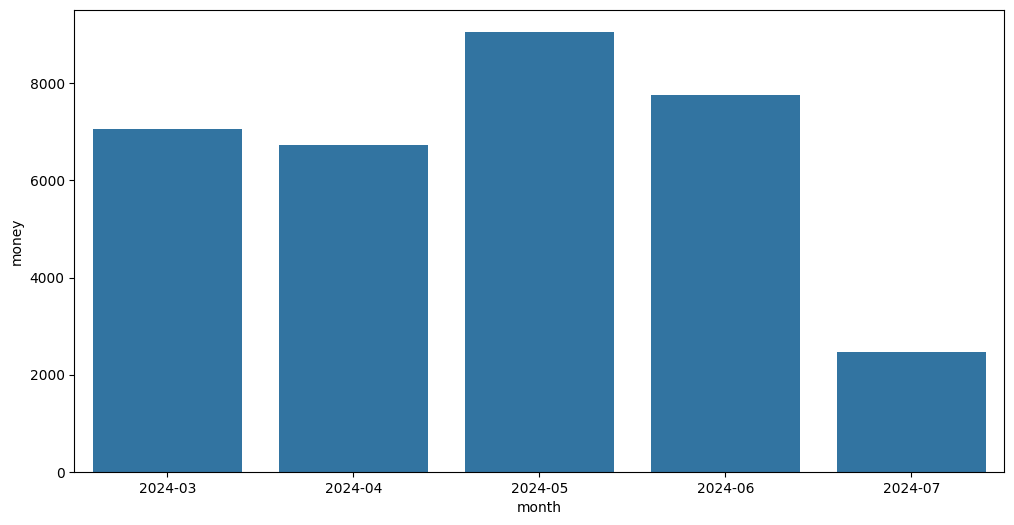

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'month', y= 'money', data= earning)

([0], [Text(0, 0, '')])

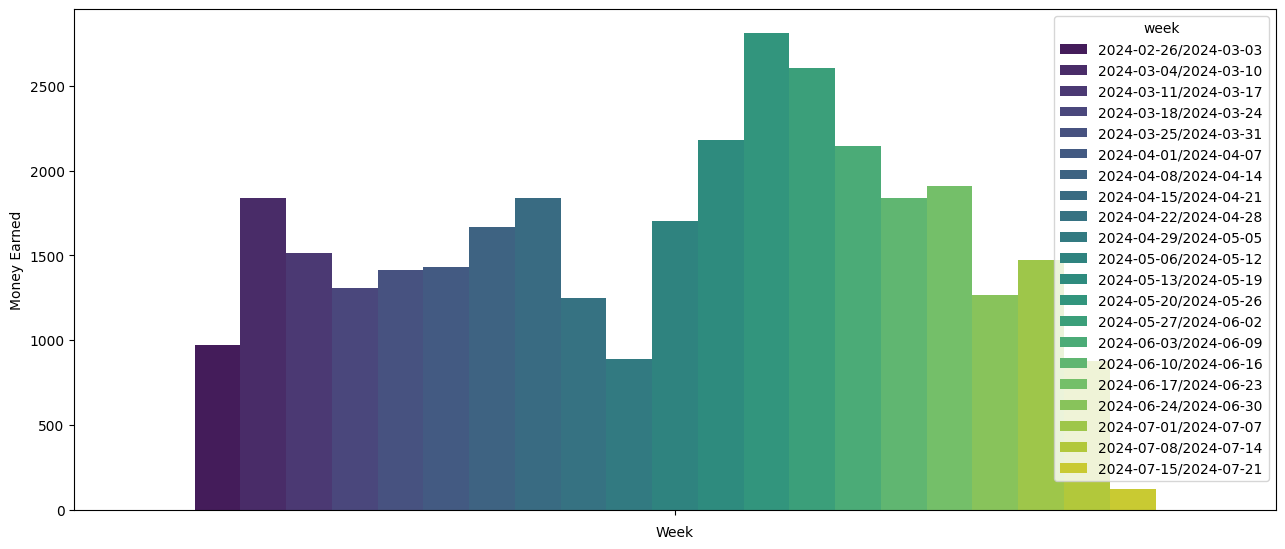

In [67]:
weekly_earning = df.groupby('week')['money'].sum().reset_index()

plt.figure(figsize=(15.5, 6.5))
sns.barplot(hue = 'week',y= 'money', data= weekly_earning, palette='viridis')
plt.xlabel('Week')
plt.ylabel('Money Earned')
plt.xticks(rotation = 90)